In [1]:
opt_bids = [3.8622484787564275 , 2.1216094606111944,  2.347134281066495]
opt_price =6.321089806558111

In [5]:
import numpy as np
from tqdm import tqdm
from environment import EnvironmentSingleClass
from learners.ucb_learner import UCB1
from learners.ts_learner import TS_Learner

#Variable initialization
T = 365
n_classes = 3
n_bids = 10 
n_prices = 13 
n_arms = n_bids*n_prices
bids_space = np.linspace(1.0, 10.0, n_bids)
price_space = np.linspace(3.0, 15.0, n_prices)
bids = np.ones(3)
prices = np.ones(3)
regrets =[[],[],[]]
sols = [[],[],[]] #Tryed Solutions

#Object Initialization 
env = EnvironmentSingleClass(noise_variance= 0.05)
ts_learners= [TS_Learner(n_arms = n_arms),TS_Learner(n_arms = n_arms),TS_Learner(n_arms = n_arms)]

for t in tqdm(range(T)):
    #TS learner 
    for c in range(n_classes):
        arm_indx = ts_learners[c].pull_arm()
        #Arm to bid, price conversion 
        bids[c] = bids_space[arm_indx % n_bids]
        prices[c] = price_space[int(np.floor(arm_indx / n_bids))]
        #Storing found solution
        sols[c].append([bids[c],prices[c]])
        reward = env.round(bids[c],prices[c],c_id = c)
        ts_learners[c].update(arm_indx, reward)
        regrets[c].append(env.round(opt_bids[c], opt_price,c, noise = False) - reward)



100%|██████████| 365/365 [00:00<00:00, 546.96it/s]


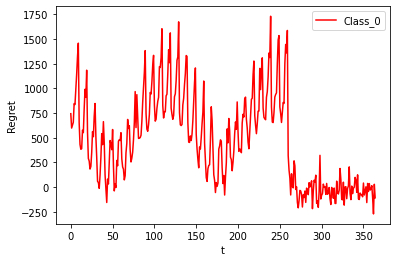

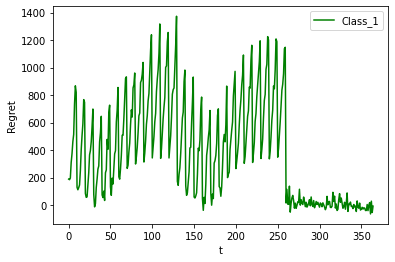

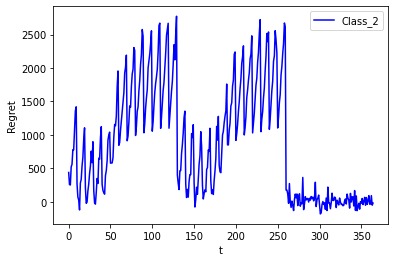

In [6]:
import matplotlib.pyplot as plt 
colors = ['r','g','b']

for c in range(3):
    plt.figure(0)
    plt.xlabel("t")
    plt.ylabel("Regret")
    plt.plot(regrets[c] , colors[c])
    plt.legend(["Class_"+str(c) ])
    plt.show()

In [7]:
regrets[0][-10:]

[36.71758224762857,
 -45.3370100303614,
 35.366243264842524,
 -30.3193704519565,
 -22.09046358284263,
 13.546579933274188,
 -109.84068573465493,
 -272.38930426317074,
 28.040647657034697,
 -109.13333678710387]

In [14]:
sols[0][-5:]

[[4.0, 7.0], [4.0, 7.0], [4.0, 7.0], [4.0, 7.0], [4.0, 7.0]]

In [16]:
sols[1][-5:]

[[2.0, 6.0], [2.0, 6.0], [2.0, 6.0], [2.0, 6.0], [2.0, 6.0]]

In [17]:
sols[2][-5:]

[[2.0, 5.0], [2.0, 6.0], [3.0, 6.0], [2.0, 6.0], [2.0, 6.0]]